In [2]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yahooquery as yq
import random

import matplotlib.pyplot as plt
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

from ConformalMethods import AdaptiveCP, ACP_plots, ACP_data

In [3]:
stock_data = ACP_data.stock_data(10)

In [4]:
ACP = AdaptiveCP(0.1)

In [5]:

def test_on_data(data, ic = [*range(50, 500, 10)], k=2 ):
    MACI_dict = {'coverge':[], 'width':[]}
    ACI_dict = {'coverge':[], 'width':[]}


    for i, data in enumerate(data):
        maci = ACP.MACI(data, interval_candidates=ic, nu_sigma=(3*(10**-4), 0.15), k=k )
    
        aci = ACP.ACI(data, custom_interval=500, startpoint=max(ic))

        MACI_dict['coverge'].append(maci['realised_interval_coverage'])
        MACI_dict['width'].append(maci['average_prediction_interval'])

        ACI_dict['coverge'].append(aci['realised_interval_coverage'])
        ACI_dict['width'].append(aci['average_prediction_interval'])

        if i % 10 == 0:
            print(i)
    
    maci_coverage = np.array(MACI_dict['coverge'])
    maci_width = np.array(MACI_dict['width'])

    aci_coverage = np.array(ACI_dict['coverge'])
    aci_width = np.array(ACI_dict['width'])

    print('MACI coverage:', np.mean(maci_coverage), np.mean(maci_width))
    print('ACI coverage:', np.mean(aci_coverage), np.mean(aci_width))
    


In [6]:
new_transform = lambda x: np.append(x[:2], 0.5*x[:-2] + 0.5*x[1:-1] + x[2:])
random_data = ACP_data.random_multi_shift(25, seq_range=(4000,5000), data_transformation=new_transform)

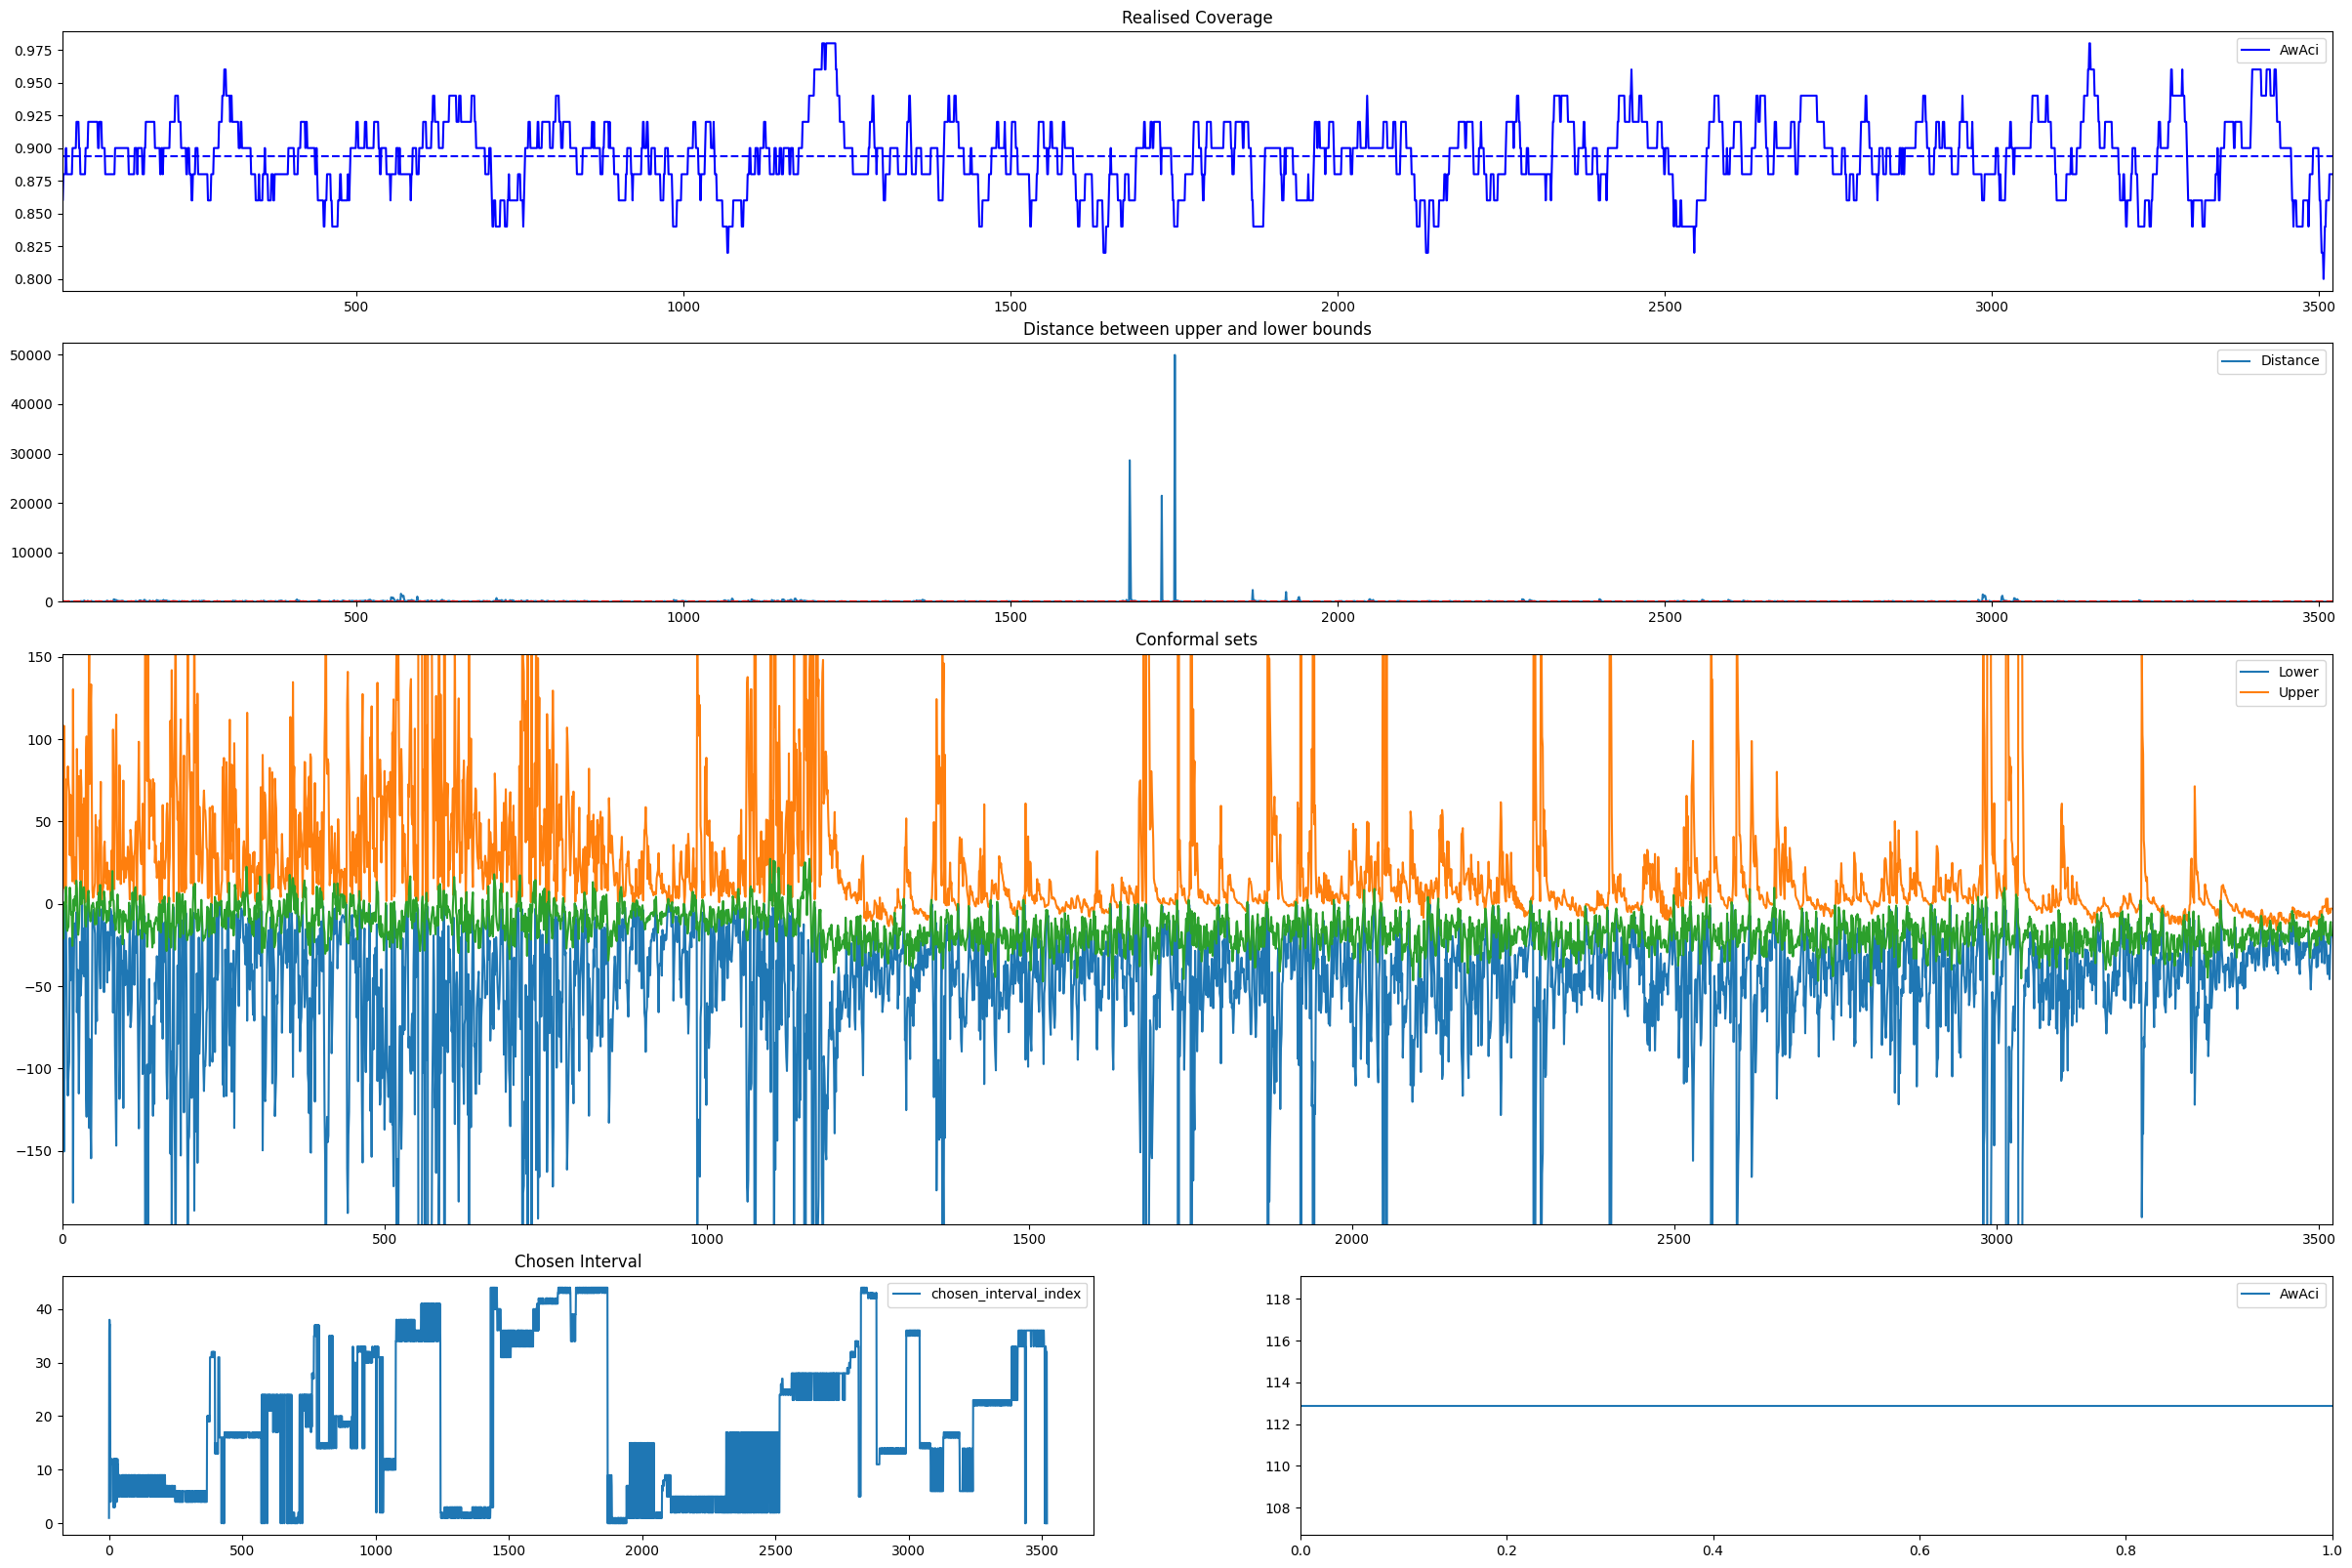

In [7]:
result = ACP.MACI(random_data[0], interval_candidates=[*range(50, 500, 10)], nu_sigma=(3*(10**-4), 0.15), k=2 )
ACP_plots.AwDT_plot(result, random_data[0], 0)

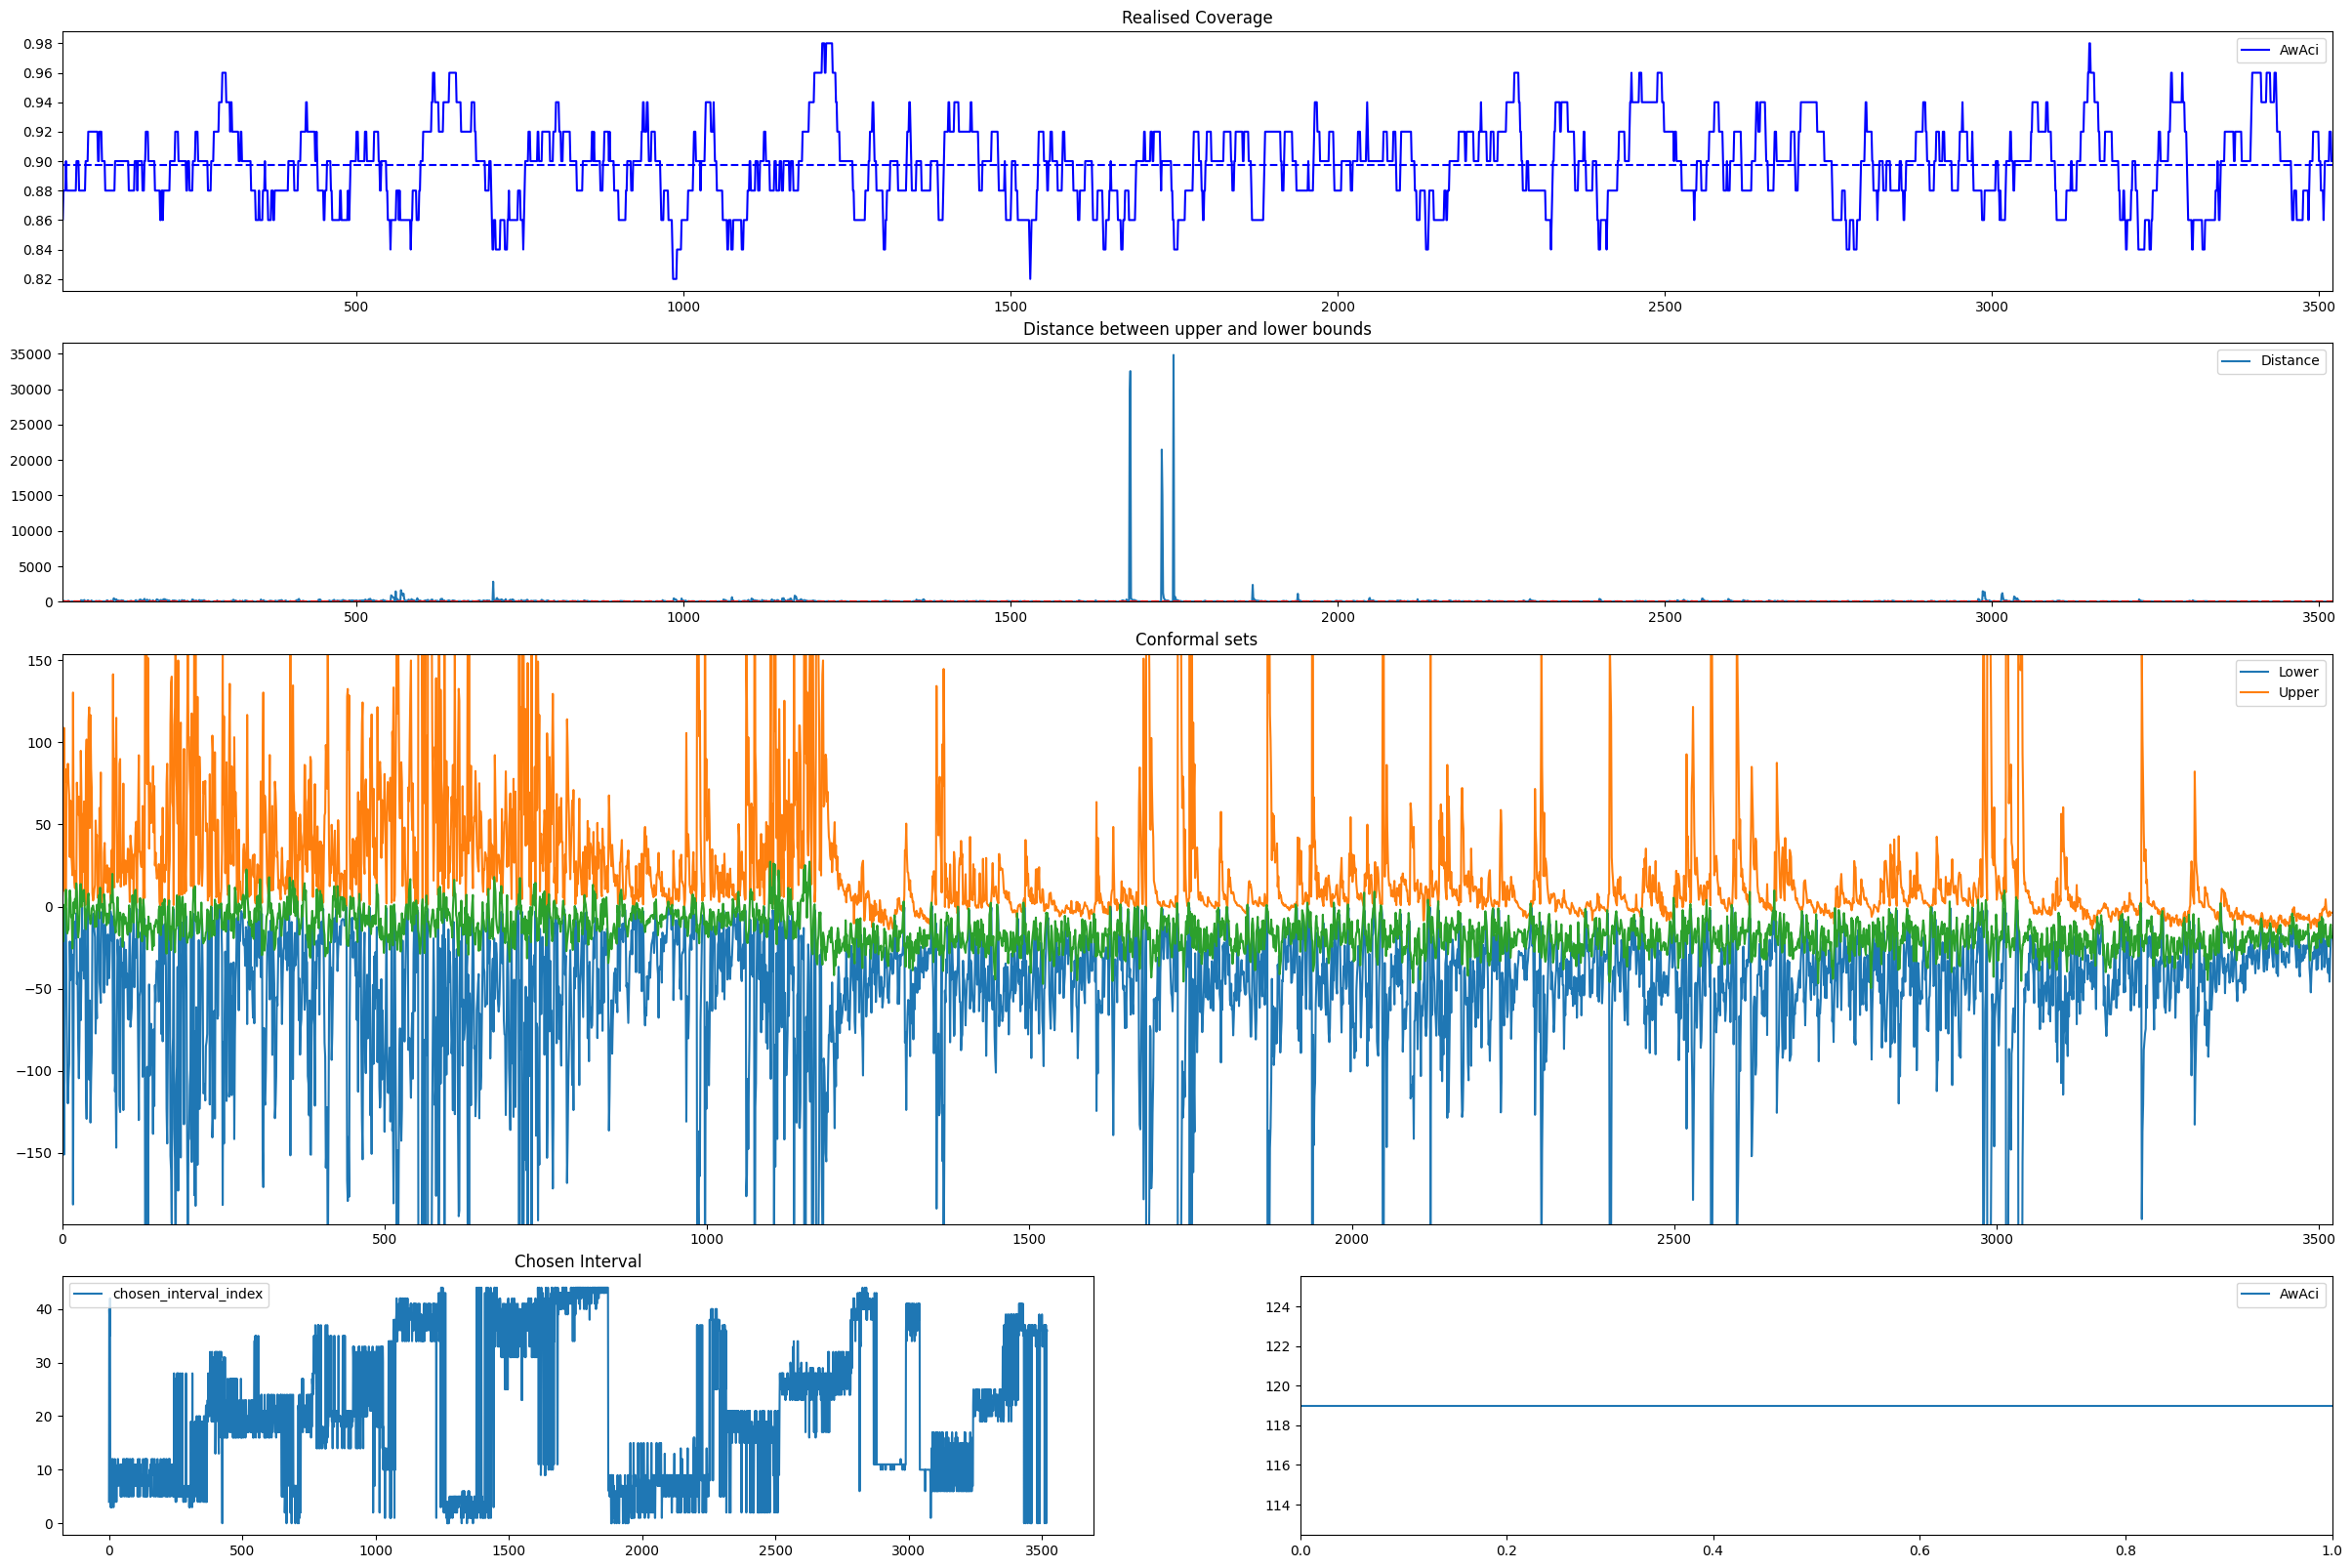

In [8]:
result = ACP.MACI(random_data[0], interval_candidates=[*range(50, 500, 10)], nu_sigma=(3*(10**-4), 0.15), k=6 )
ACP_plots.AwDT_plot(result, random_data[0], 0)

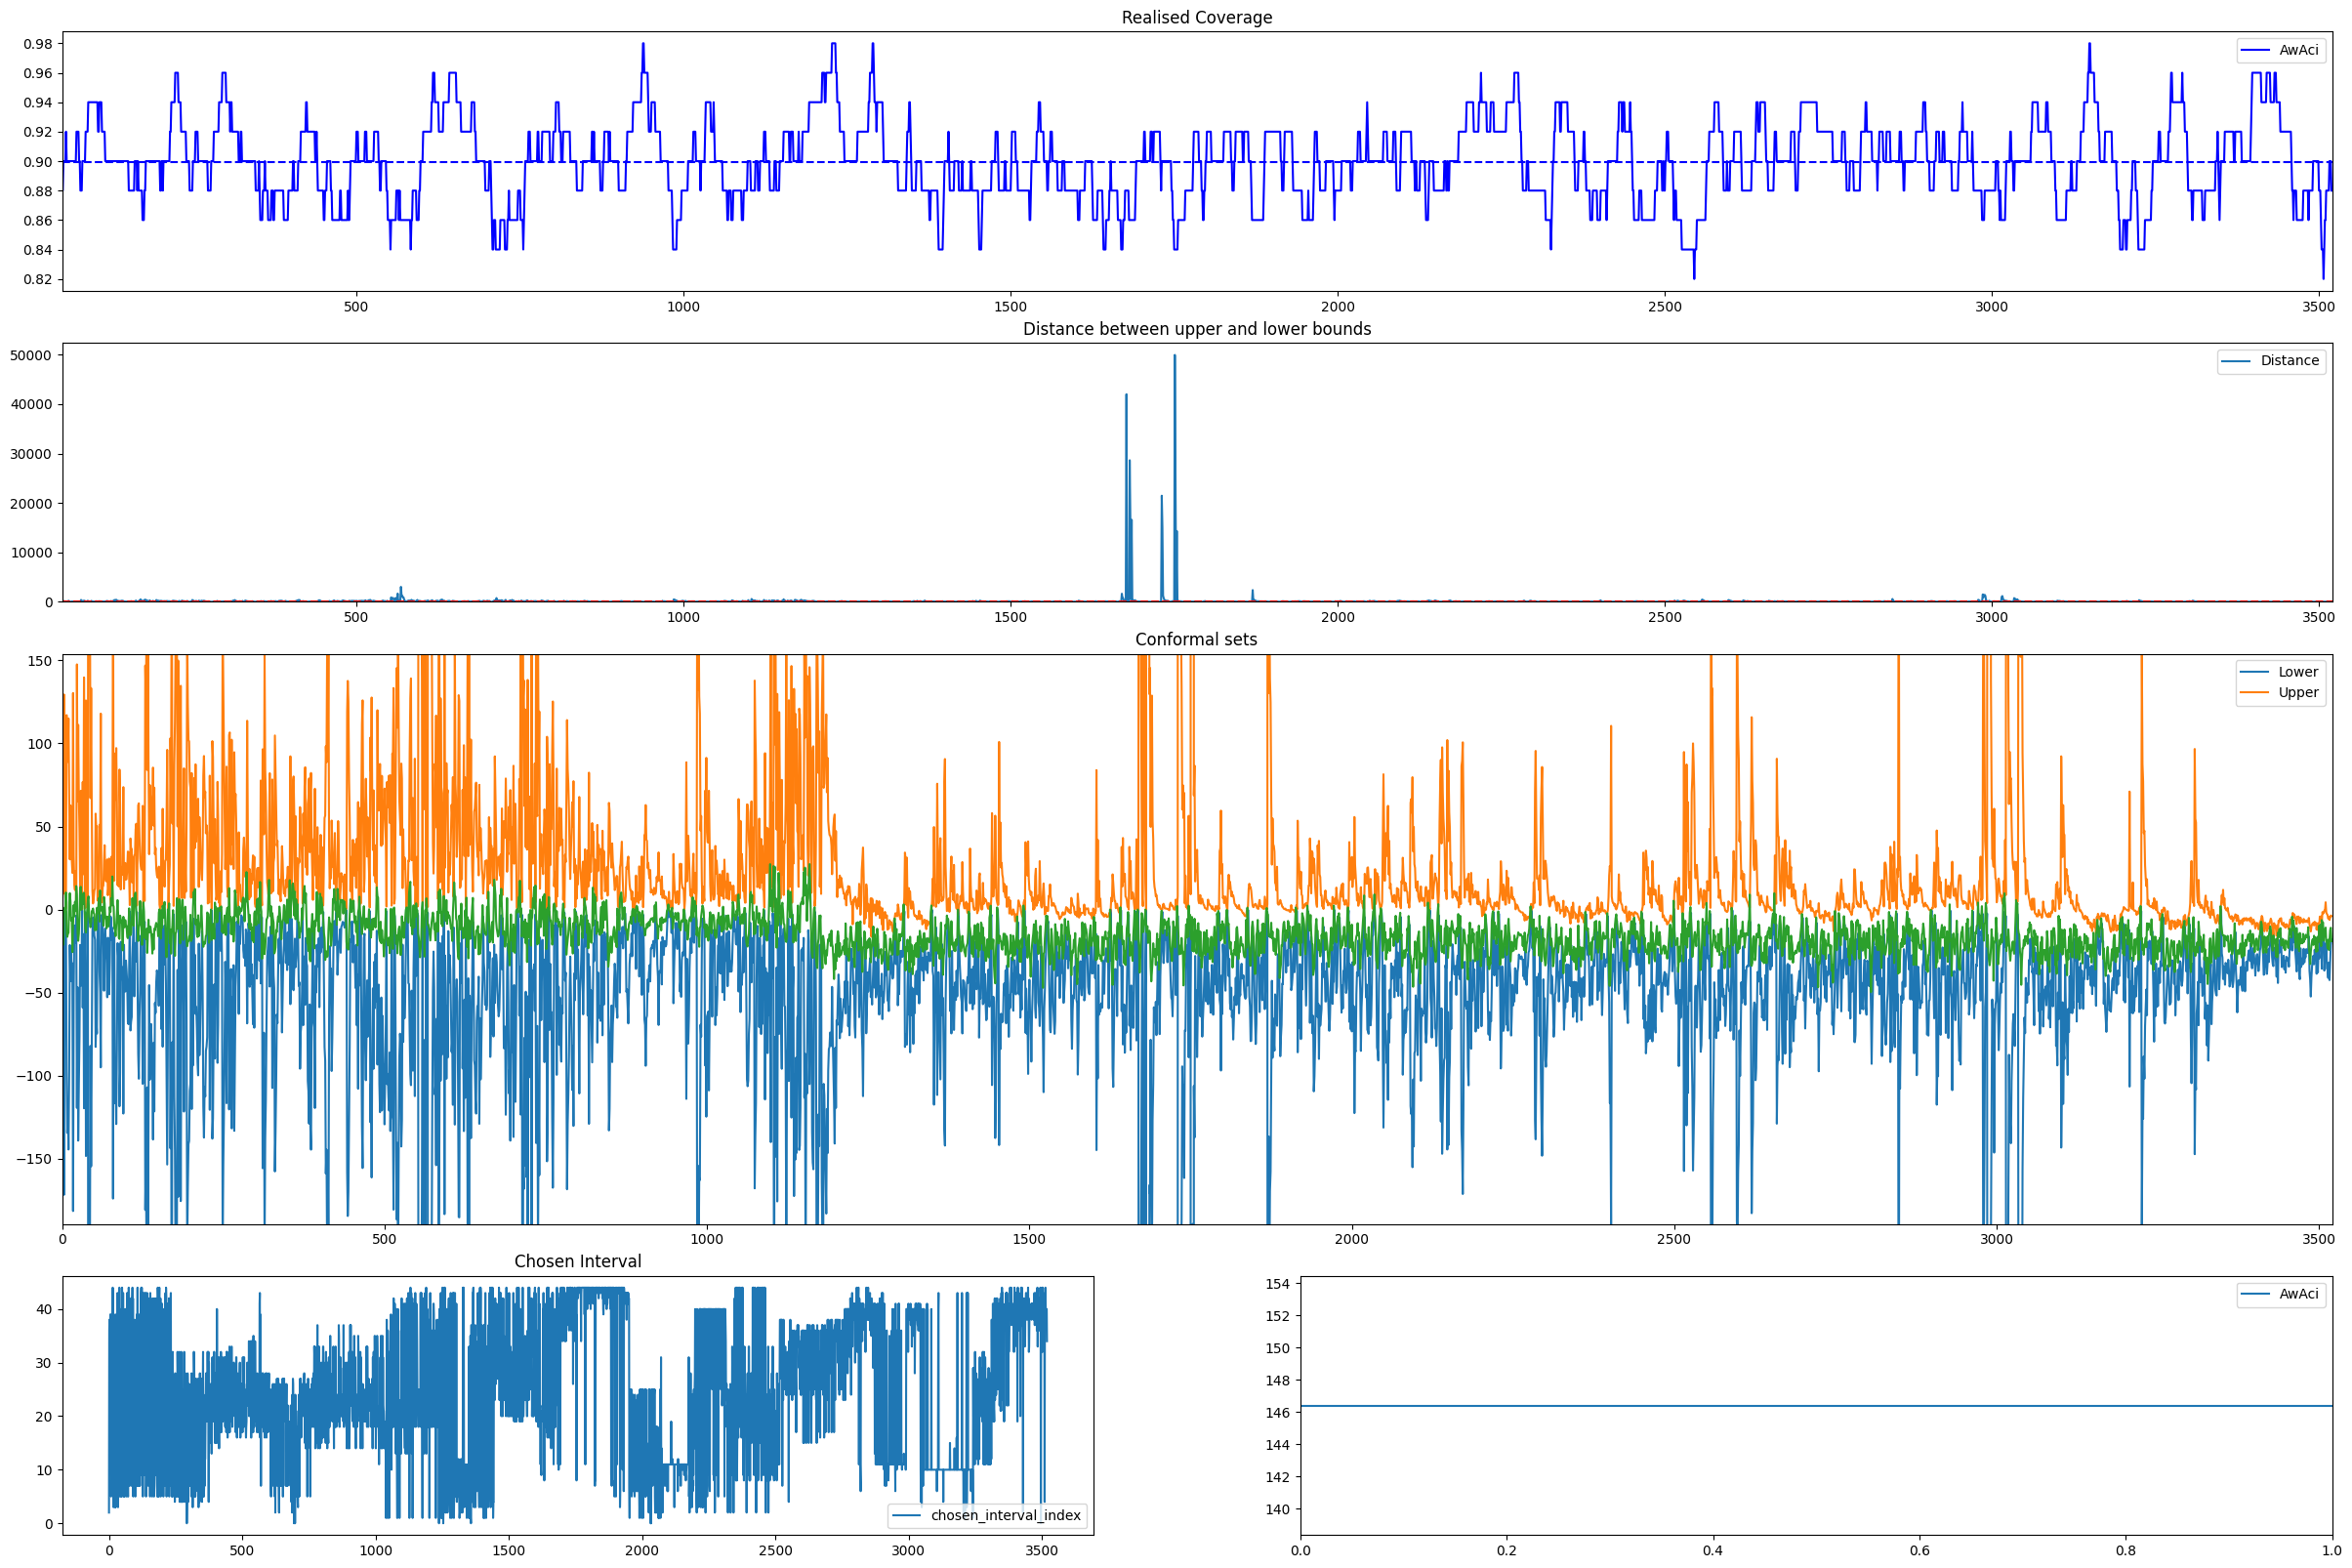

In [9]:
result = ACP.MACI(random_data[0], interval_candidates=[*range(50, 500, 10)], nu_sigma=(3*(10**-4), 0.15), k=15 )
ACP_plots.AwDT_plot(result, random_data[0], 0)

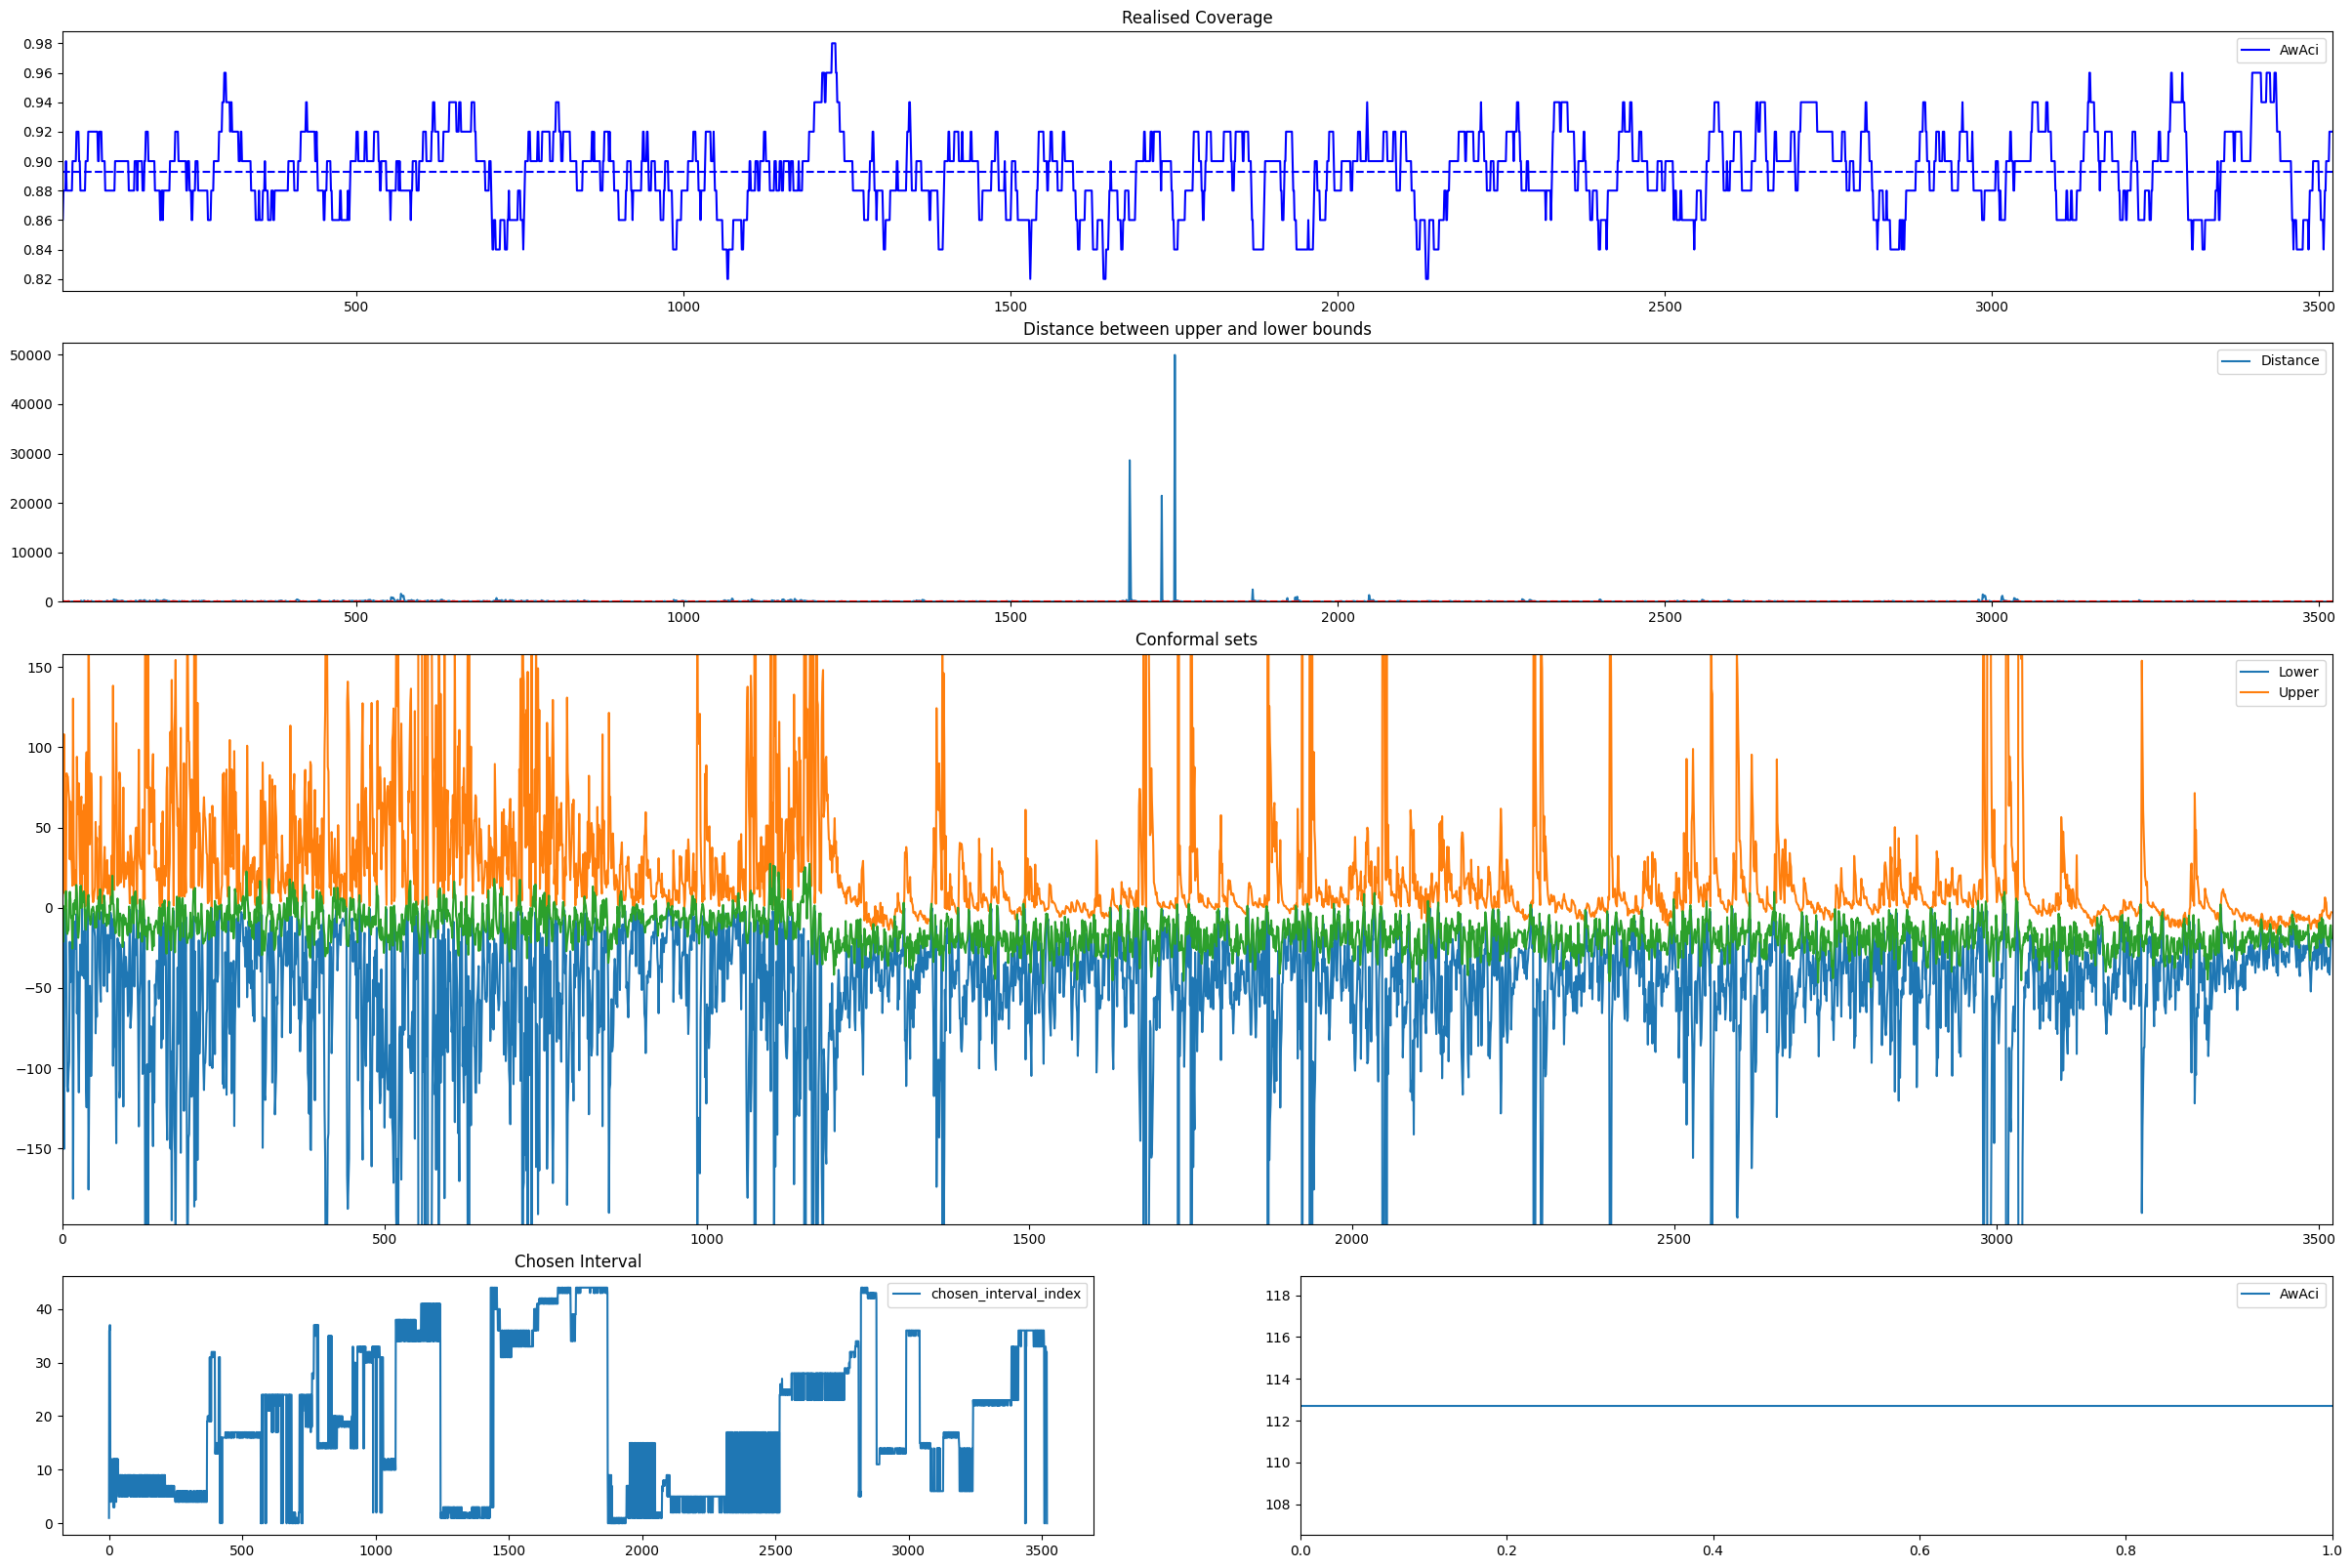

In [10]:
result = ACP.MACI(random_data[0], interval_candidates=[*range(50, 500, 10)], nu_sigma=(3*(10**-4), 0.15), k=2 )
ACP_plots.AwDT_plot(result, random_data[0], 0)

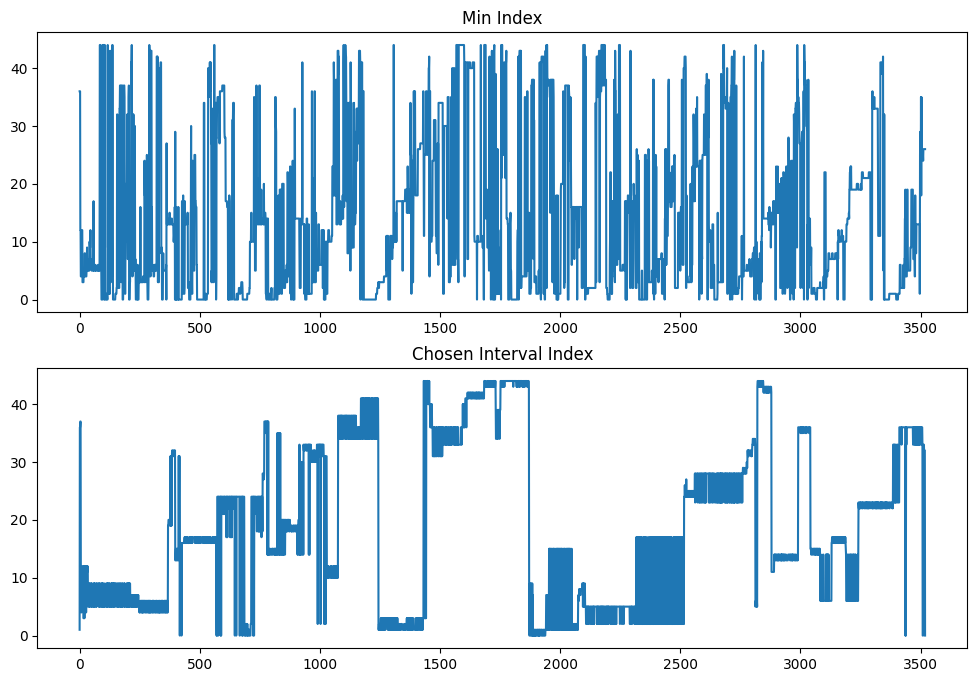

In [11]:
min_index = [np.argmin(x) for x in result['all_head_radii']]

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(min_index)
axs[0].set_title('Min Index')

axs[1].plot(result['chosen_interval_index'])
axs[1].set_title('Chosen Interval Index')

plt.show()

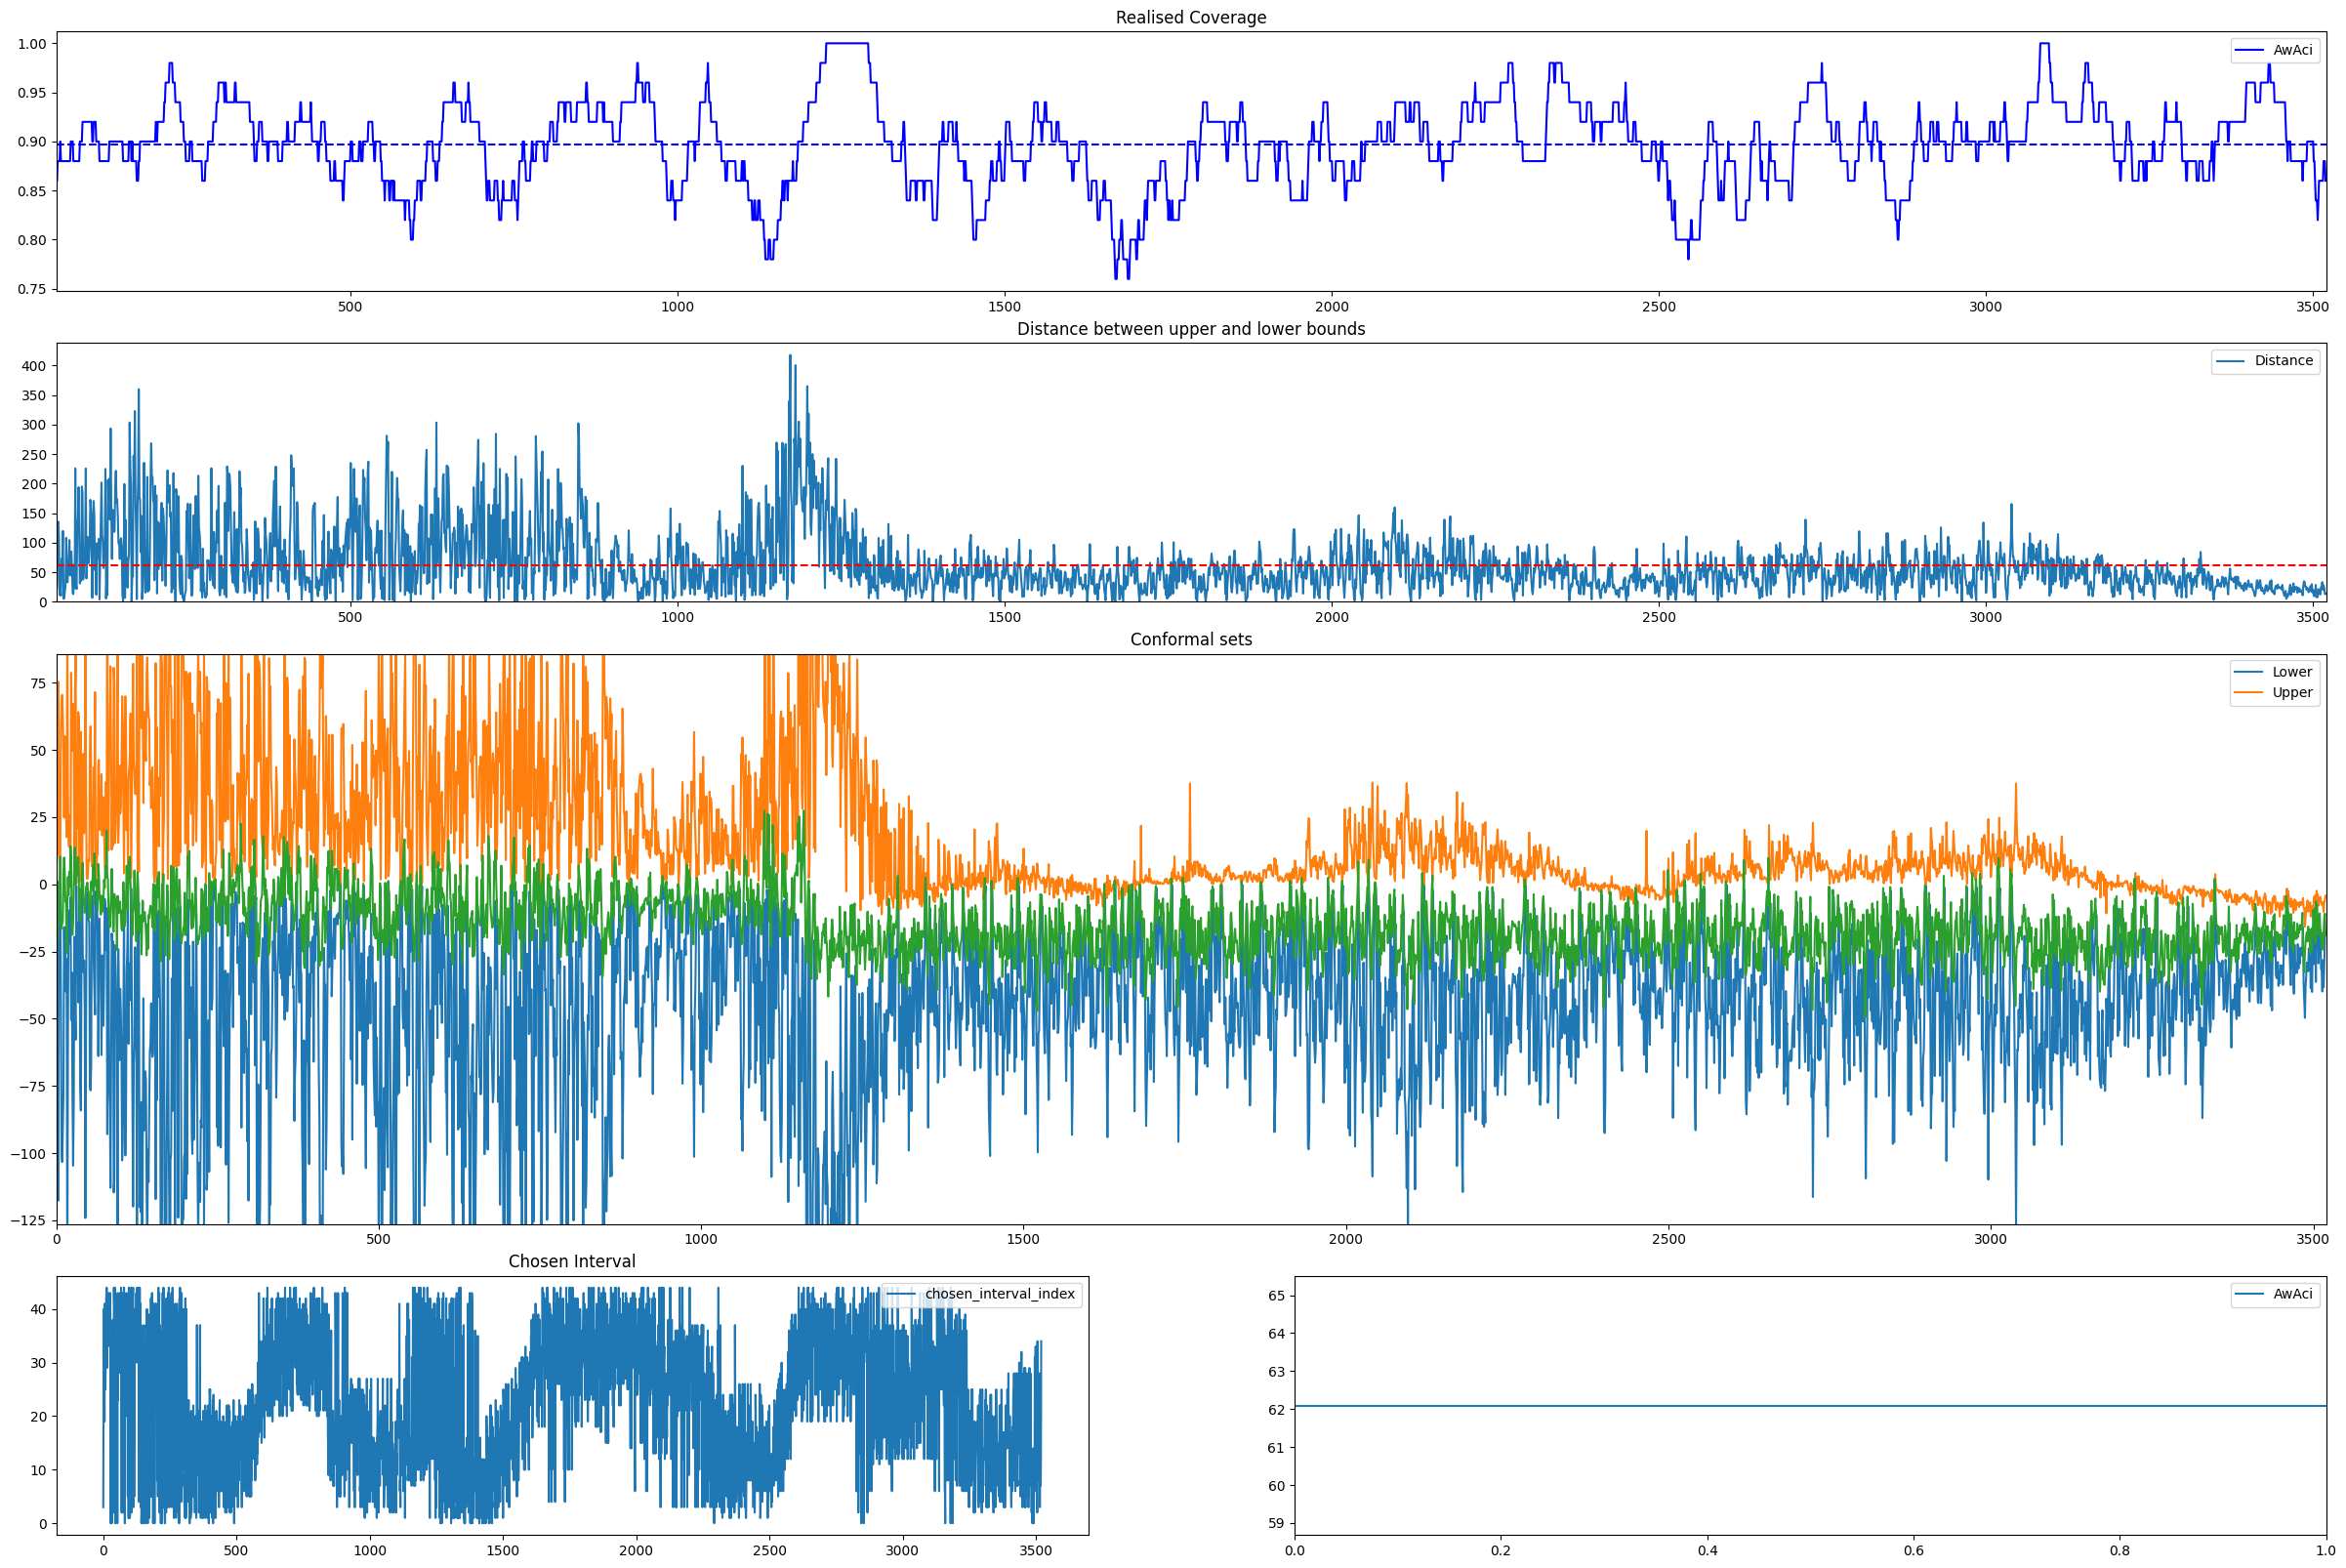

In [12]:
result = ACP.MACI(random_data[0], interval_candidates=[*range(50, 500, 10)], nu_sigma=(3*(10**-4), 0.15), k=24, gamma=0.005 )
ACP_plots.AwDT_plot(result, random_data[0], 0)

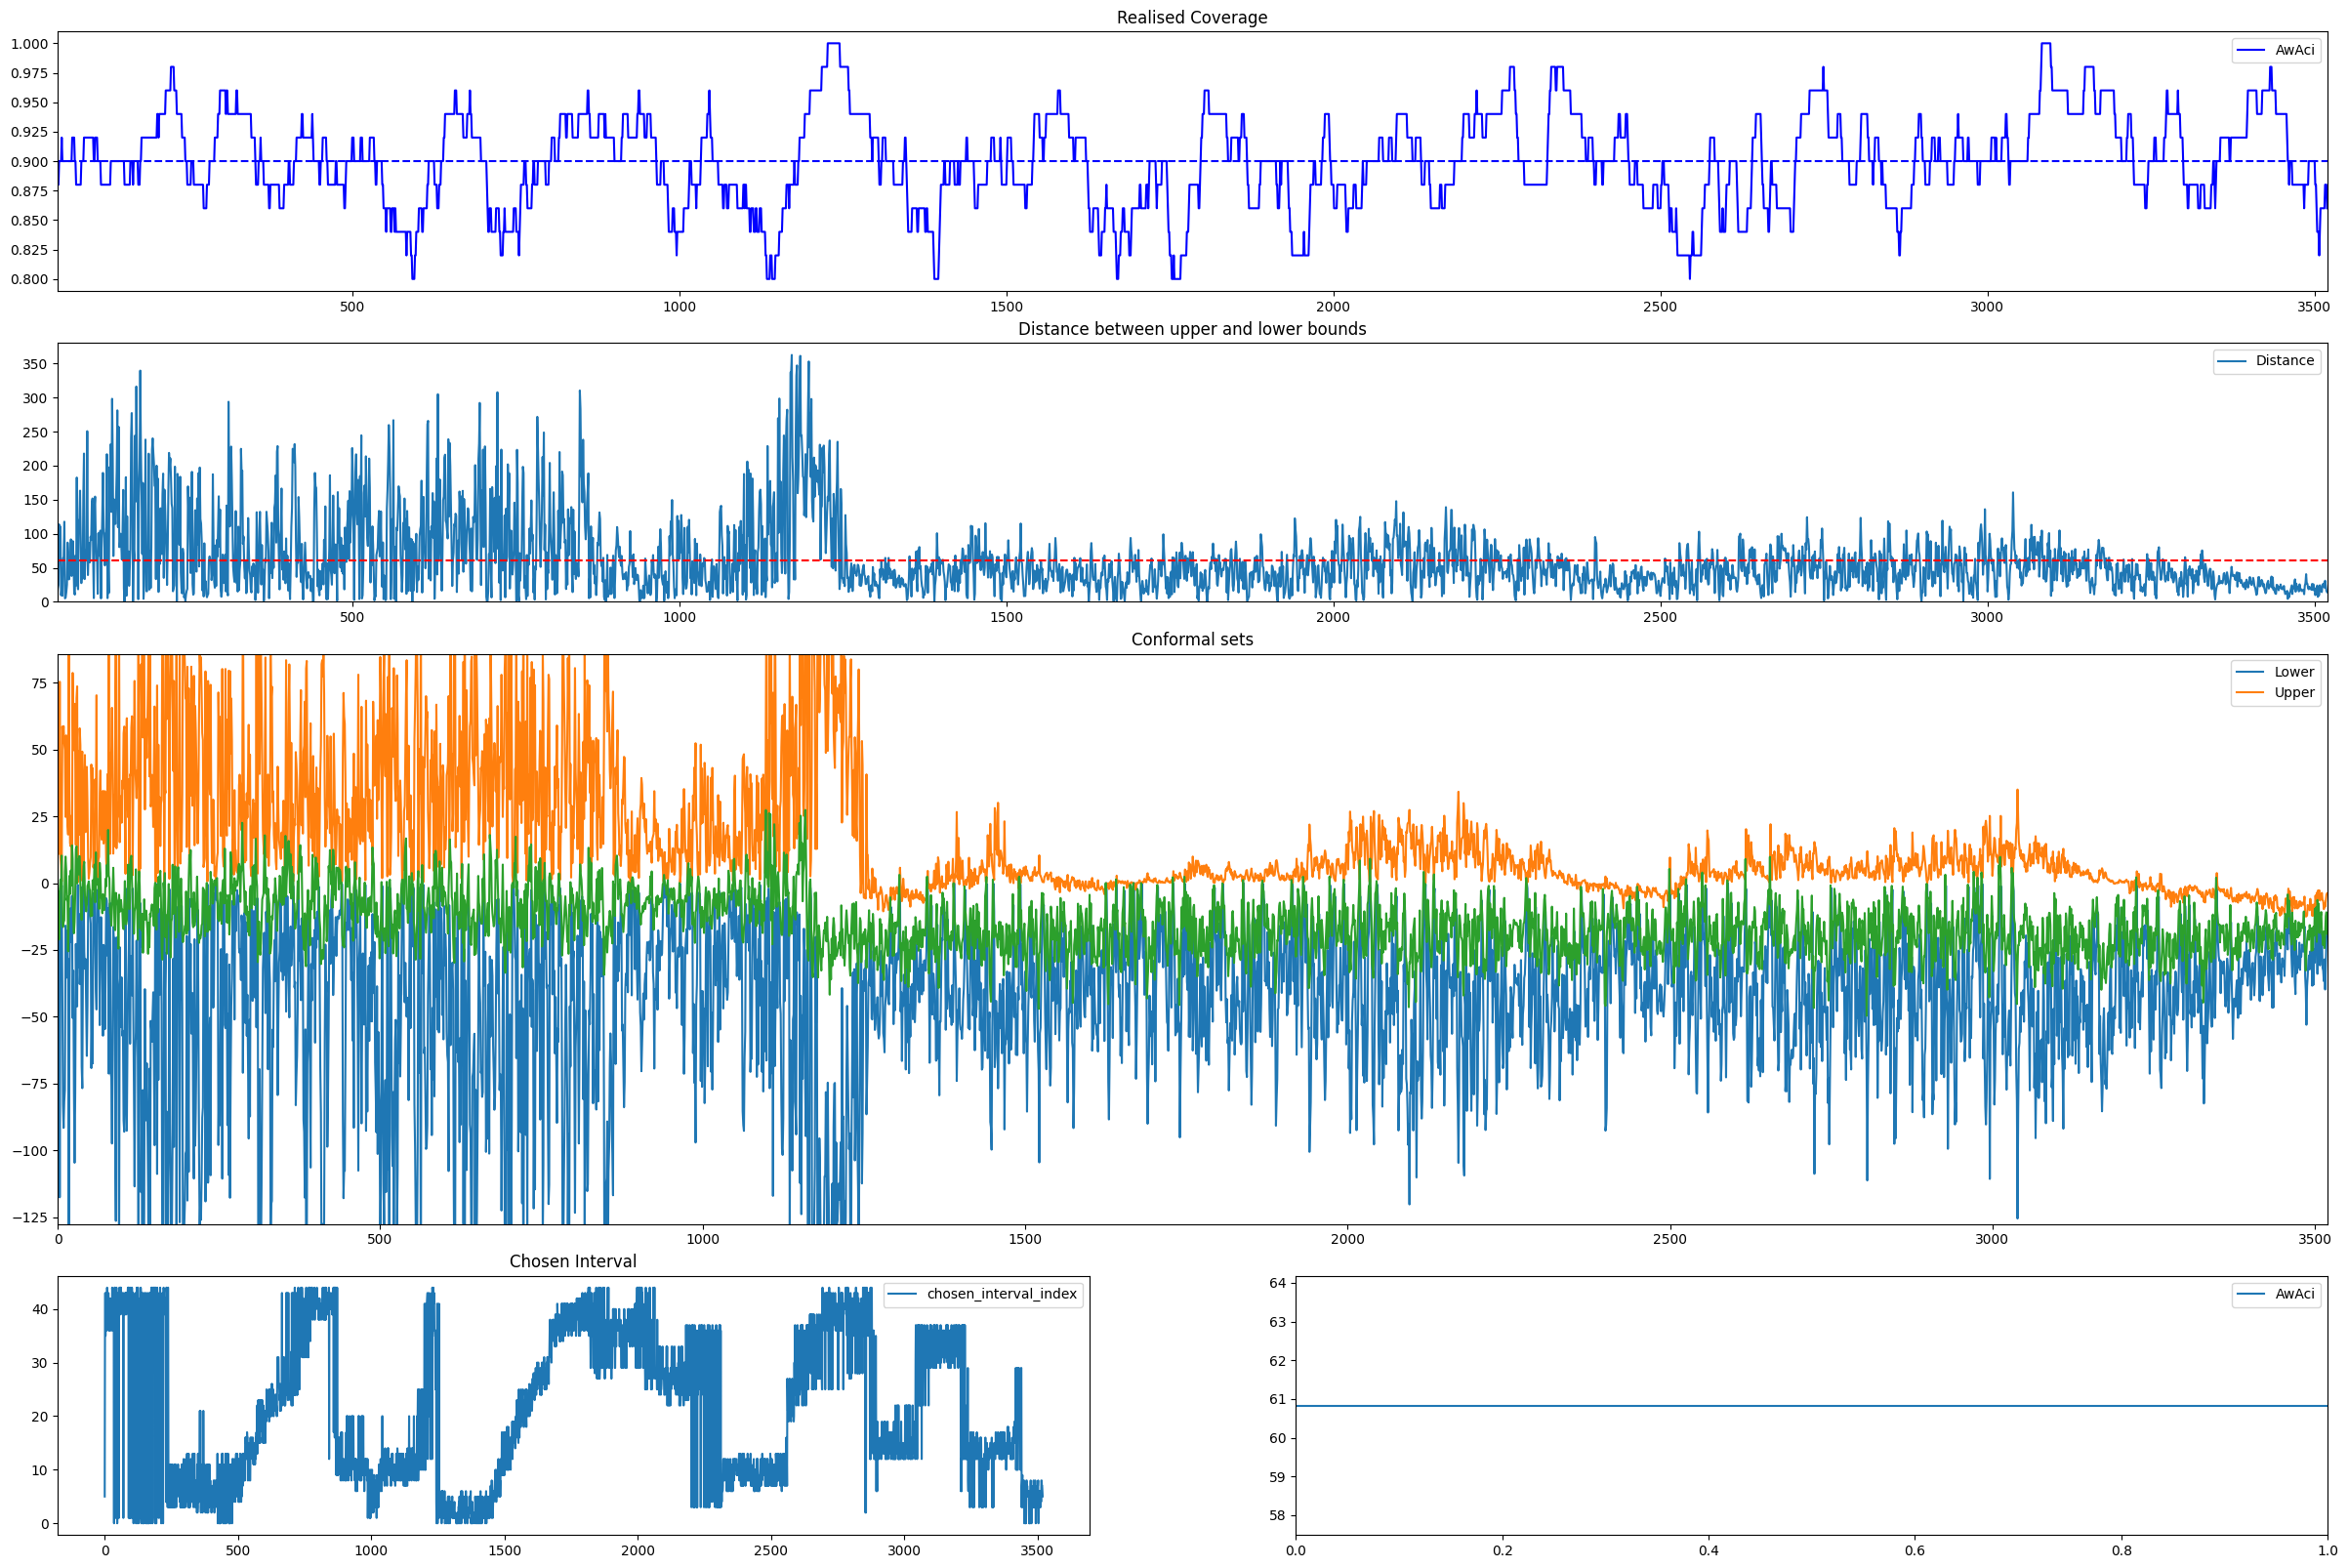

In [13]:
result = ACP.MACI(random_data[0], interval_candidates=[*range(50, 500, 10)], nu_sigma=(3*(10**-4), 0.15), k=7, gamma=0.005)
ACP_plots.AwDT_plot(result, random_data[0], 0)

0.8944268167860798


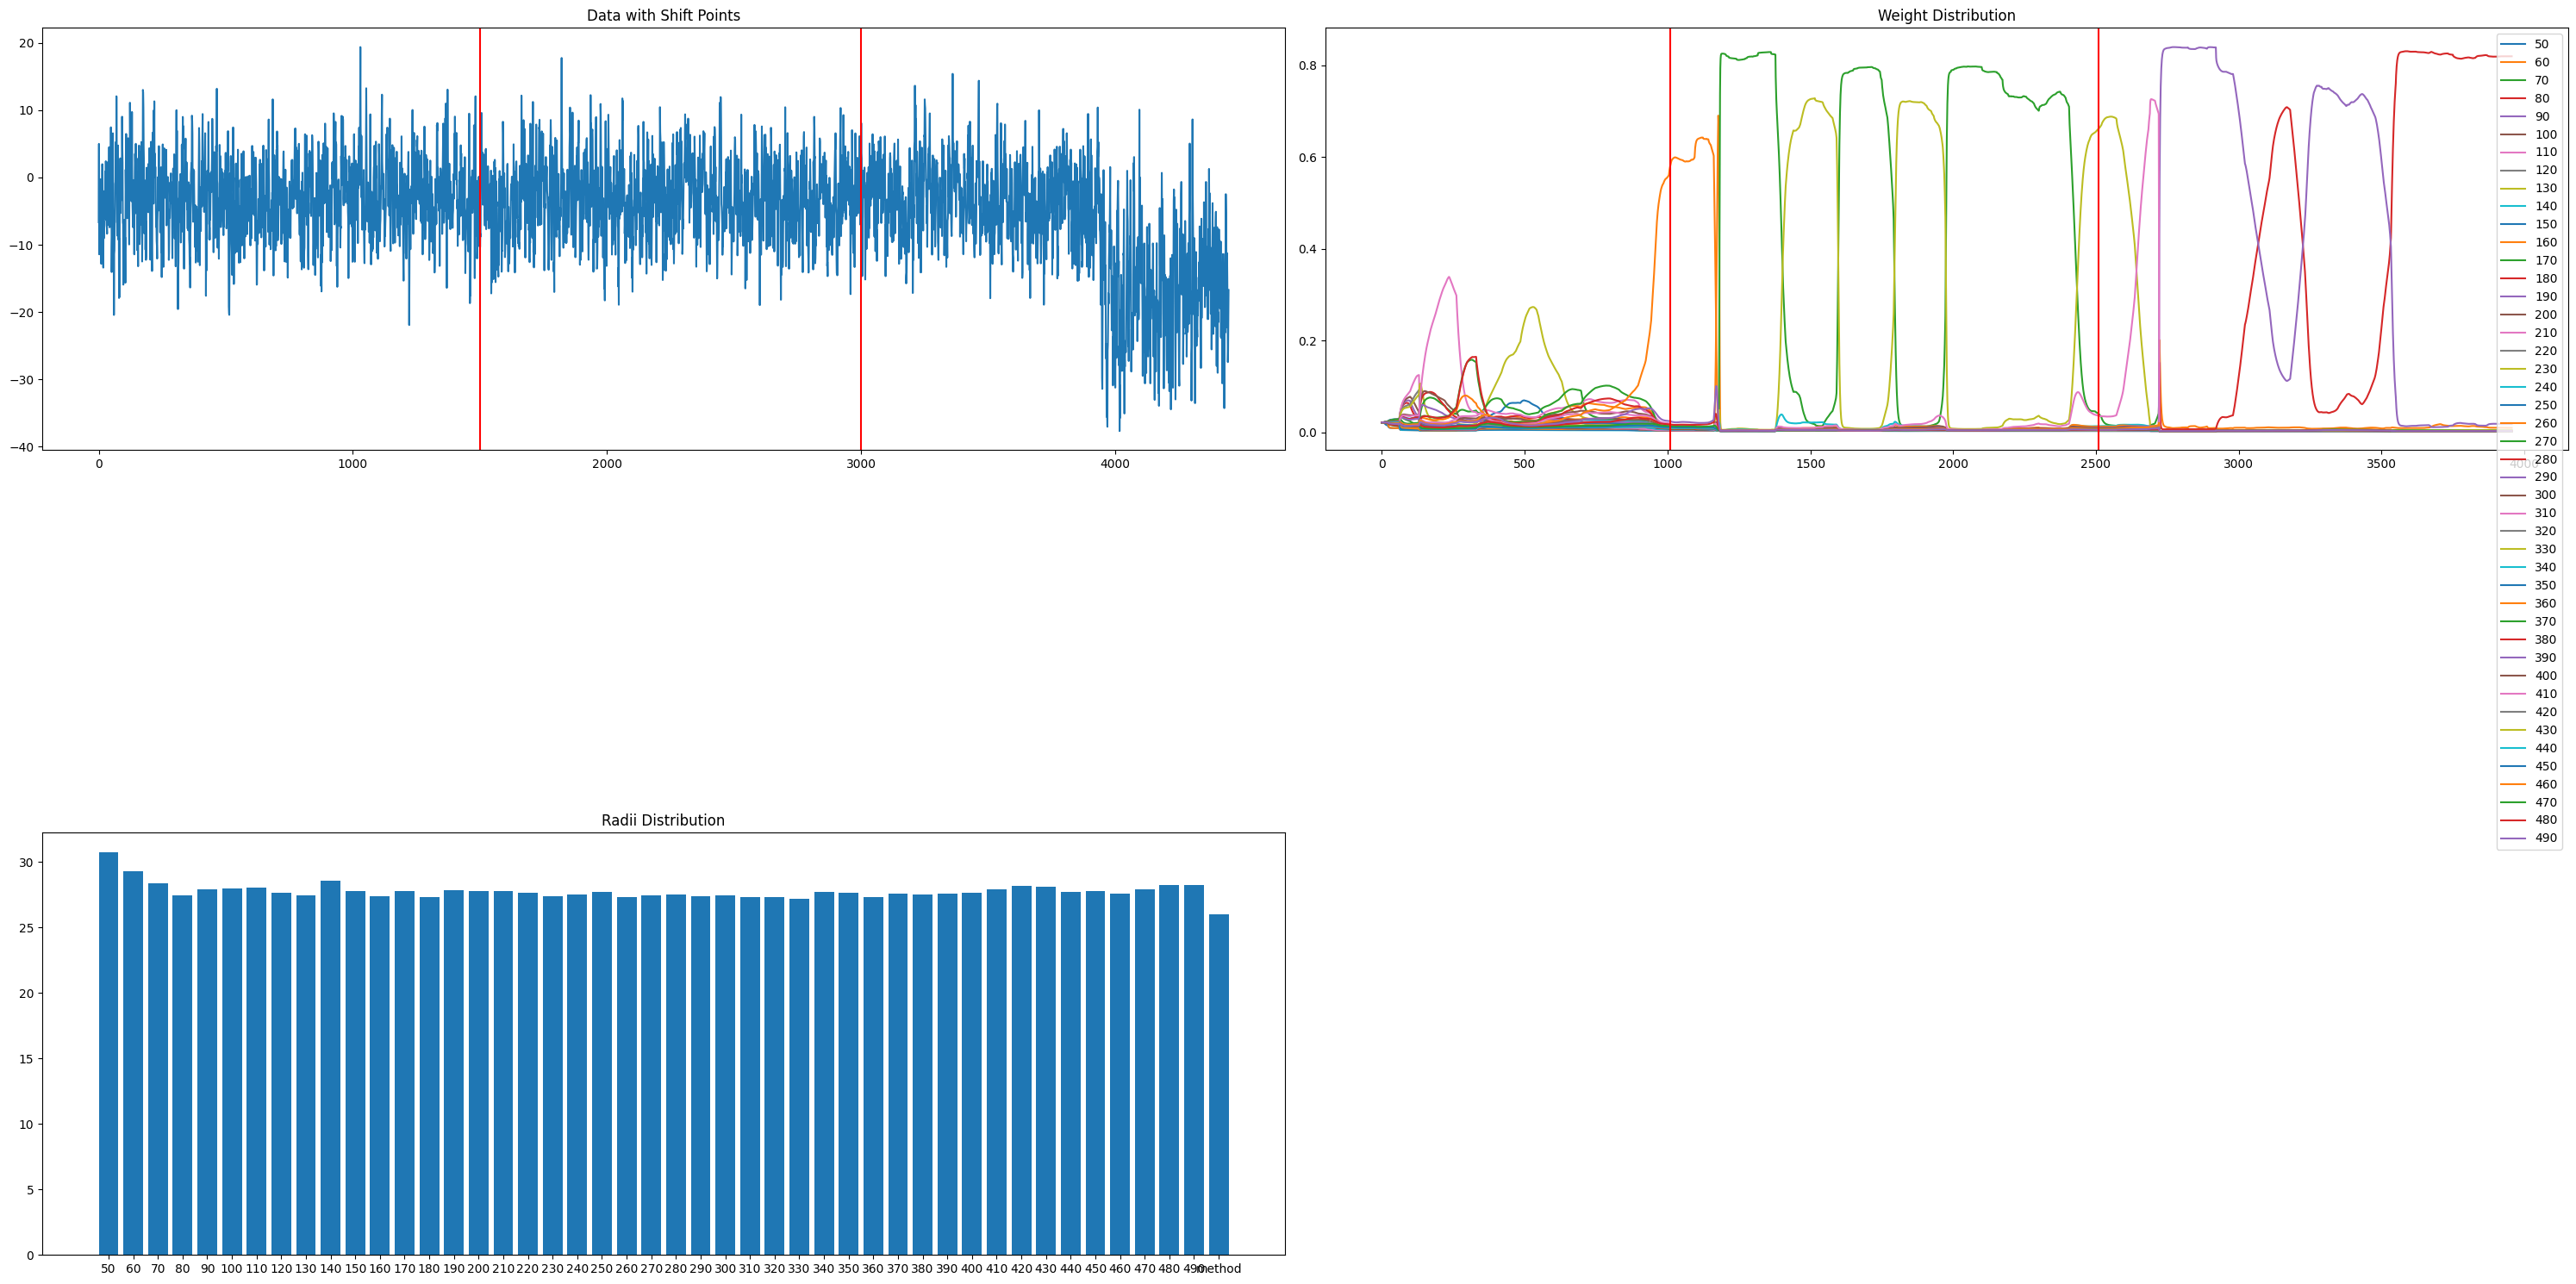

Section: 0 ----------------------------------------------------------------------------------------------------
1010
[(np.int64(0), np.float64(0.0001238766171881518)), (np.int64(2), np.float64(3.176780090181828e-05)), (np.int64(3), np.float64(0.0007305078150289909)), (np.int64(4), np.float64(0.0005158515699085464)), (np.int64(6), np.float64(0.00024115362014437034)), (np.int64(7), np.float64(2.9315187071938733e-05)), (np.int64(8), np.float64(0.00015316073961852282)), (np.int64(9), np.float64(0.0001106127826625151)), (np.int64(10), np.float64(4.7146740830883285e-05)), (np.int64(13), np.float64(0.0007275200453474236)), (np.int64(15), np.float64(0.0002565669300162254)), (np.int64(16), np.float64(0.0014837479733997795)), (np.int64(17), np.float64(0.00026237860697986444)), (np.int64(22), np.float64(0.0004256013373744687)), (np.int64(23), np.float64(0.000579440574106689)), (np.int64(25), np.float64(0.0013974018111067438)), (np.int64(26), np.float64(0.00502251144305416)), (np.int64(29), np.flo

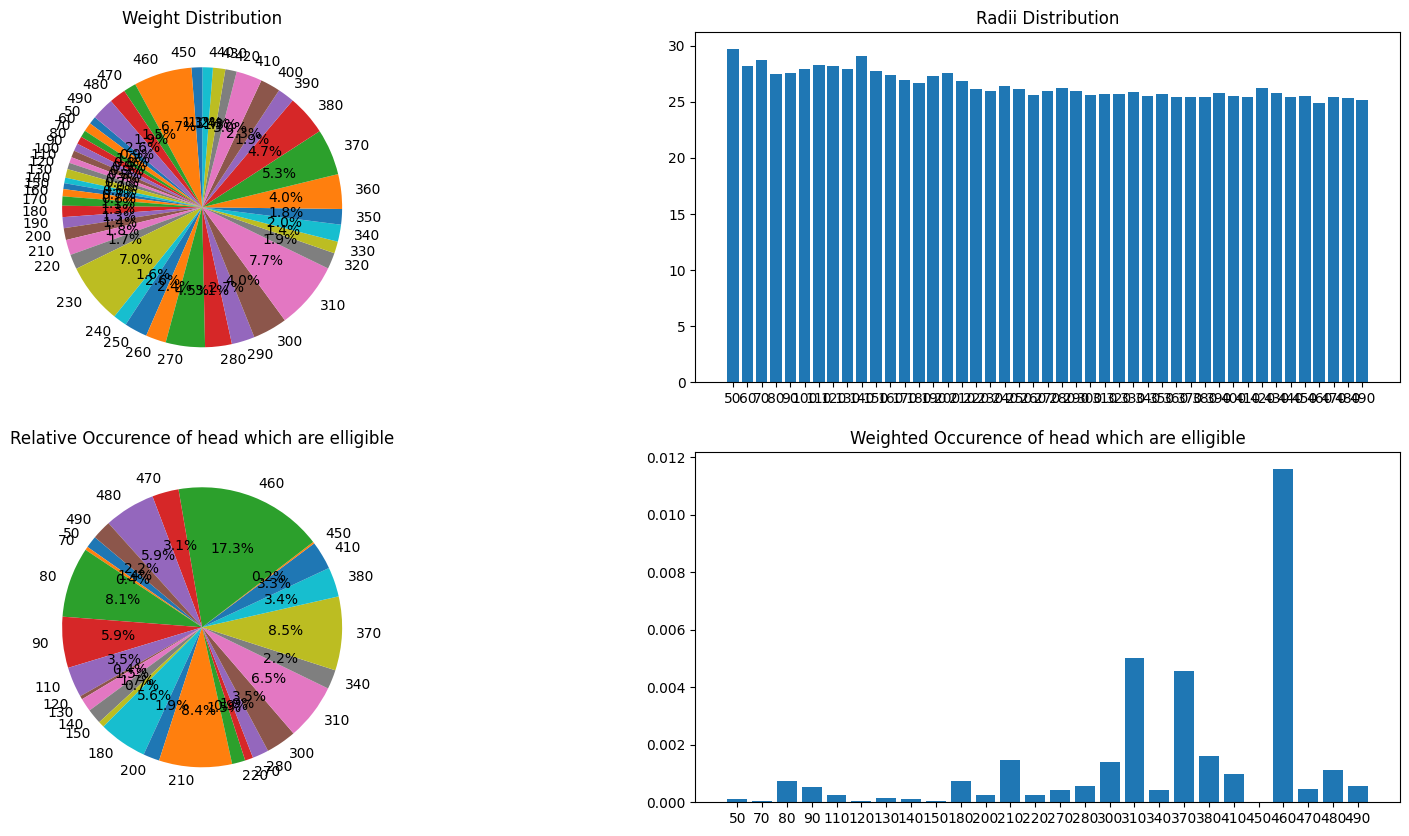

Section: 1 ----------------------------------------------------------------------------------------------------
1500
[(np.int64(0), np.float64(0.0002387874833167956)), (np.int64(1), np.float64(0.0007916149581803568)), (np.int64(2), np.float64(0.07436801090252439)), (np.int64(3), np.float64(0.0003611539129069803)), (np.int64(4), np.float64(6.211683860187795e-05)), (np.int64(7), np.float64(8.892204441160437e-05)), (np.int64(8), np.float64(0.00015034398016333414)), (np.int64(9), np.float64(5.65444660966095e-05)), (np.int64(10), np.float64(6.577210062066795e-05)), (np.int64(11), np.float64(2.0525284726724566e-05)), (np.int64(13), np.float64(8.672505070545795e-05)), (np.int64(14), np.float64(1.993194456400394e-05)), (np.int64(15), np.float64(0.00037036906424815384)), (np.int64(18), np.float64(0.005564789909511097)), (np.int64(19), np.float64(0.0004139530967761708)), (np.int64(22), np.float64(9.607735476534687e-05)), (np.int64(24), np.float64(0.00010228965493493576)), (np.int64(25), np.float

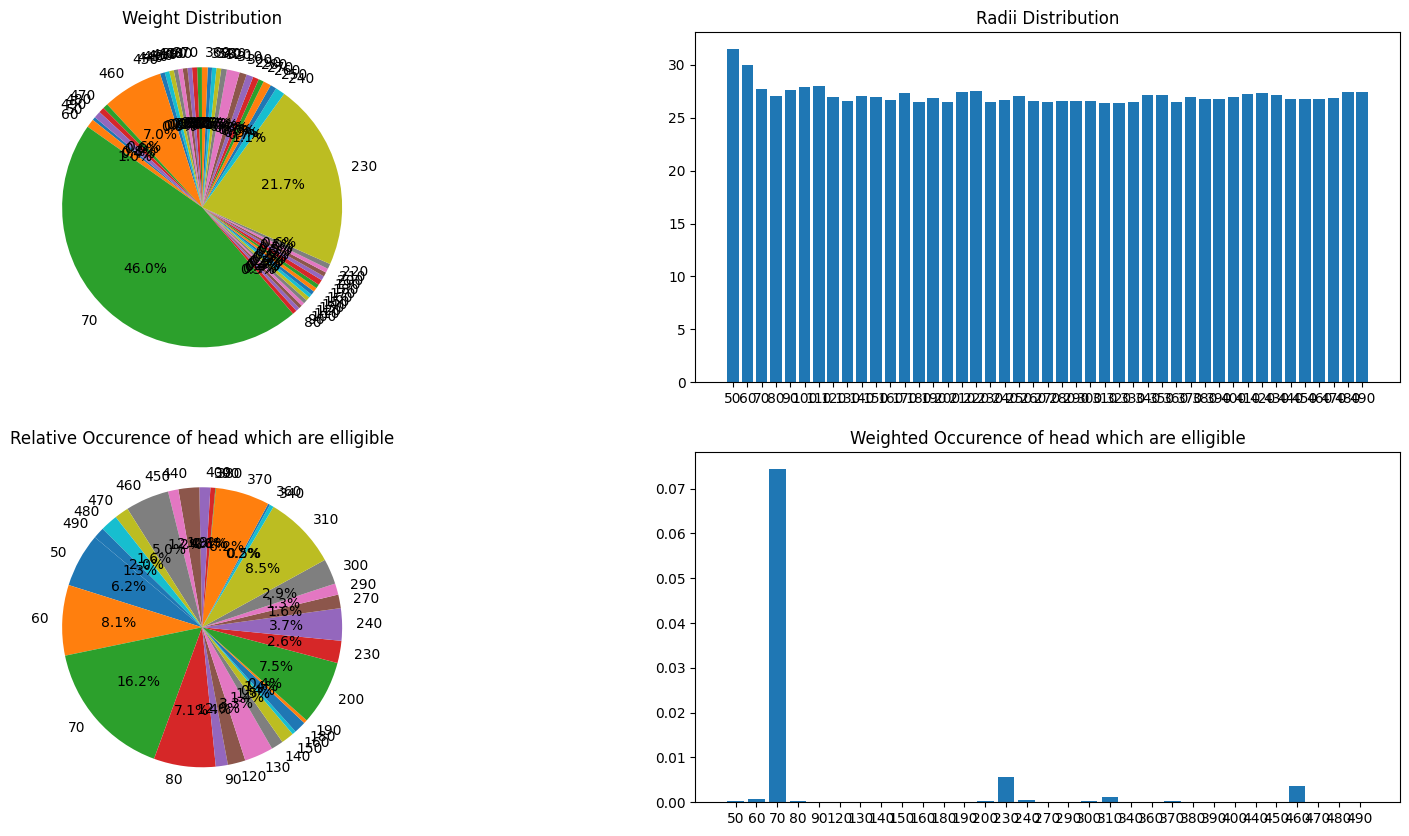

Section: 2 ----------------------------------------------------------------------------------------------------
1447
[(np.int64(0), np.float64(0.00030455650583429675)), (np.int64(1), np.float64(0.0015163662543021348)), (np.int64(2), np.float64(1.6910713685659936e-05)), (np.int64(3), np.float64(0.04355509494109398)), (np.int64(4), np.float64(0.007236089184486439)), (np.int64(5), np.float64(1.1509071872109566e-05)), (np.int64(7), np.float64(1.430702097115027e-05)), (np.int64(8), np.float64(6.023486618222348e-05)), (np.int64(10), np.float64(3.3590164145140096e-05)), (np.int64(11), np.float64(7.91910266711439e-05)), (np.int64(12), np.float64(0.00010028998435072619)), (np.int64(13), np.float64(9.734341165435932e-05)), (np.int64(15), np.float64(1.914367794648198e-05)), (np.int64(16), np.float64(2.030949268399255e-05)), (np.int64(17), np.float64(9.376277944719003e-05)), (np.int64(18), np.float64(0.0007612415383724306)), (np.int64(19), np.float64(1.0804794685738146e-05)), (np.int64(20), np.flo

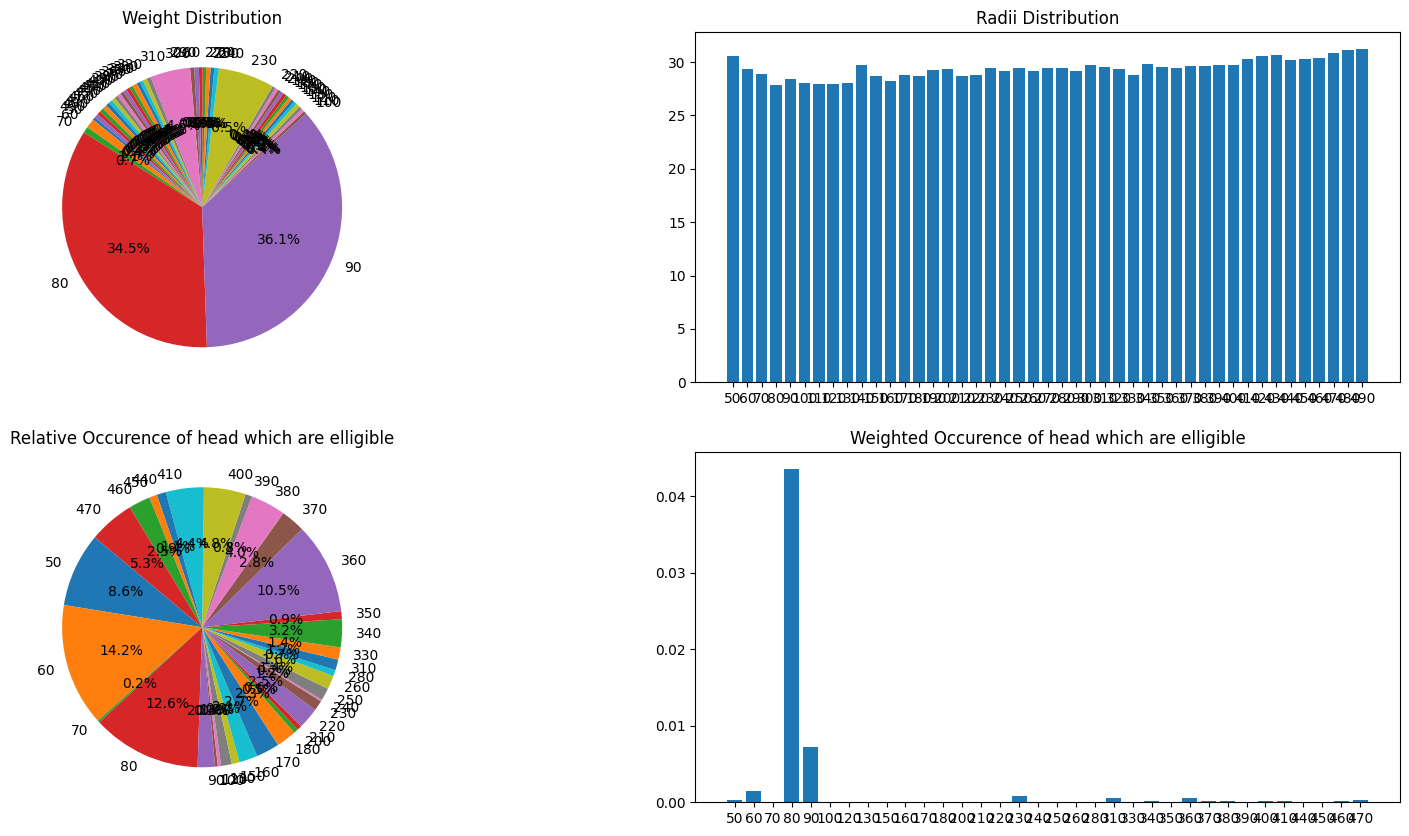

In [22]:
ACP_plots.analyse_MACI(random_data[1], method=ACP.MACI, candidates=[*range(50, 500, 10)], nu_sigma=(3*(10**-3), 0.15), shift_list=[1500, 3000], k=2, gamma=0.005)